In [1]:
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from util import *

import warnings
warnings.simplefilter("ignore")

%matplotlib inline

In [2]:
with open('./dataset/ck.plus.pickle','rb') as f:
    ck_data, ck_label = pickle.load(f)
    
ck_data_train, ck_data_test, ck_label_train, ck_label_test = train_test_split(ck_data, ck_label, test_size=0.25, random_state=42)

In [3]:
target_classes = get_face_label()
target_classes

['😐', '😠', '😏', '😷', '😨', '😀', '😢', '😱']

In [4]:
%%time
lda = LinearDiscriminantAnalysis(solver='svd').fit(ck_data_train, ck_label_train)
pca = PCA(n_components=7, svd_solver='randomized', whiten=True).fit(lda.transform(ck_data_train))

ck_data_train_ipca = pca.transform(lda.transform(ck_data_train))
ck_data_test_ipca = pca.transform(lda.transform(ck_data_test))

CPU times: user 33.6 s, sys: 672 ms, total: 34.3 s
Wall time: 18.9 s


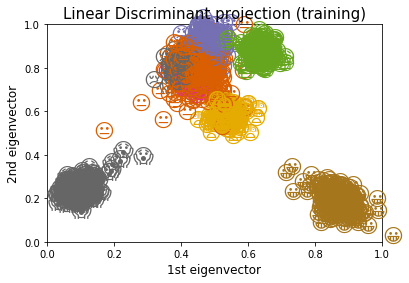

In [5]:
plot_face(lda.transform(ck_data_train), ck_label_train, 'Linear Discriminant projection (training)', xlabel='1st eigenvector', ylabel='2nd eigenvector')

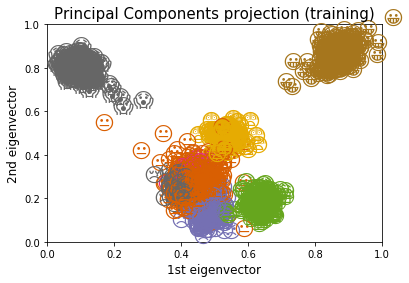

In [6]:
plot_face(ck_data_train_ipca , ck_label_train, 'Principal Components projection (training)', xlabel='1st eigenvector', ylabel='2nd eigenvector')

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
              precision    recall  f1-score   support

           😐       0.96      0.97      0.97       323
           😠       0.97      0.99      0.98        90
           😏       0.84      0.91      0.87        23
           😷       0.99      0.97      0.98        86
           😨       1.00      0.98      0.99        42
           😀       0.99      1.00      1.00       129
           😢       0.98      0.98      0.98        44
           😱       1.00      0.95      0.97       121

   micro avg       0.97      0.97      0.97       858
   macro avg       0.97      0.97      0.97       858
weighted avg       0.97      0.97      0.97       858

Accuracy:  0.9731934731934732
Normalized confusion matrix
CPU times: user 408 ms, sys: 24 ms, total: 432 ms
Wall time: 3.62

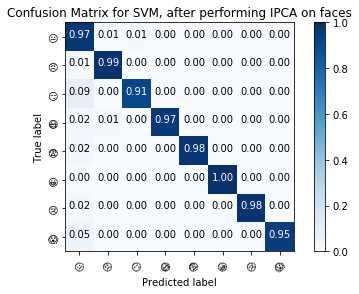

In [7]:
%%time

param_grid_svm =  {'kernel' : ['rbf', 'linear'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000], 'decision_function_shape': ['ovo', 'ovr']}

clf_svm = GridSearchCV(SVC(class_weight='balanced', random_state=42), param_grid_svm, iid=True, n_jobs=-1)

clf_svm = clf_svm.fit(ck_data_train_ipca, ck_label_train)
ck_label_predict_svm = clf_svm.predict(ck_data_test_ipca)

print(clf_svm.best_estimator_)

print(classification_report(ck_label_test, ck_label_predict_svm, target_names=target_classes))
print('Accuracy: ' , accuracy_score(ck_label_test, ck_label_predict_svm))

cm = confusion_matrix(ck_label_test, ck_label_predict_svm, labels=range(8))
plot_confusion_matrix(cm, classes=target_classes, title='Confusion Matrix for SVM, after performing IPCA on faces', normalize=True)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
              precision    recall  f1-score   support

           😐       0.95      0.98      0.97       323
           😠       0.98      0.99      0.98        90
           😏       0.83      0.87      0.85        23
           😷       0.99      0.95      0.97        86
           😨       1.00      0.98      0.99        42
           😀       1.00      1.00      1.00       129
           😢       1.00      0.98      0.99        44
           😱       1.00      0.95      0.97       121

   micro avg       0.97      0.97      0.97       858
   macro avg       0.97      0.96      0.97       858
weighted avg       0.98      0.97      0.97       858

Accuracy:  0.9743589743589743
Normalized confusion matrix
CPU times: user 104 ms, sys: 8 ms, total: 112 ms
Wall time: 979 ms


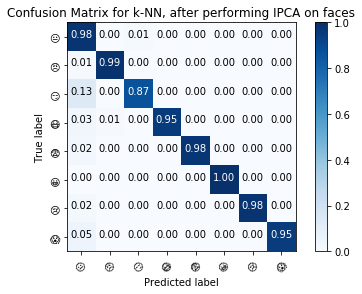

In [8]:
%%time

param_grid_knn =  {'n_neighbors': [3,5,7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

clf_knn = GridSearchCV(KNeighborsClassifier(),  param_grid_knn, iid=True, n_jobs=-1)

clf_knn = clf_knn.fit(ck_data_train_ipca, ck_label_train)
ck_label_predict_knn = clf_knn.predict(ck_data_test_ipca)

print(clf_knn.best_estimator_)

print(classification_report(ck_label_test, ck_label_predict_knn, target_names=target_classes))
print('Accuracy: ' , accuracy_score(ck_label_test, ck_label_predict_knn))

cm = confusion_matrix(ck_label_test, ck_label_predict_knn, labels=range(8))
plot_confusion_matrix(cm, classes=target_classes, title='Confusion Matrix for k-NN, after performing IPCA on faces', normalize=True)

              precision    recall  f1-score   support

           😐       0.95      0.97      0.96       323
           😠       0.96      0.98      0.97        90
           😏       0.83      0.87      0.85        23
           😷       0.99      0.95      0.97        86
           😨       0.95      0.98      0.96        42
           😀       0.99      1.00      1.00       129
           😢       0.98      0.98      0.98        44
           😱       1.00      0.93      0.97       121

   micro avg       0.97      0.97      0.97       858
   macro avg       0.96      0.96      0.96       858
weighted avg       0.97      0.97      0.97       858

Accuracy:  0.965034965034965
Normalized confusion matrix
CPU times: user 1.63 s, sys: 4 ms, total: 1.64 s
Wall time: 822 ms


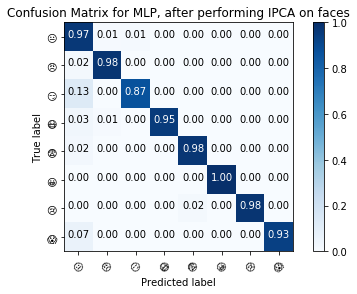

In [9]:
%%time

clf_mlp = MLPClassifier(random_state=42)
clf_mlp = clf_mlp.fit(ck_data_train_ipca, ck_label_train)
ck_label_predict_mlp = clf_mlp.predict(ck_data_test_ipca)

print(classification_report(ck_label_test, ck_label_predict_mlp, target_names=target_classes))
print('Accuracy: ' , accuracy_score(ck_label_test, ck_label_predict_mlp))

cm = confusion_matrix(ck_label_test, ck_label_predict_mlp, labels=range(8))
plot_confusion_matrix(cm, classes=target_classes, title='Confusion Matrix for MLP, after performing IPCA on faces', normalize=True)